In [7]:
import pandas as pd
from neuralprophet import NeuralProphet
import joblib

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
#core_weather = pd.read_csv("local_weather.csv",parse_dates=["DATE"], index_col=["DATE"])

In [8]:
core_weather = pd.read_csv("local_weather.csv")

In [9]:
core_weather["DATE"]=pd.to_datetime(core_weather["DATE"])

In [84]:
core_weather.index

RangeIndex(start=0, stop=17456, step=1)

In [85]:
core_weather.columns

Index(['STATION', 'NAME', 'DATE', 'ACMH', 'ACSH', 'AWND', 'DAPR', 'FMTM',
       'FRGT', 'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN',
       'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WSF1', 'WSF2', 'WSF5', 'WSFG',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09', 'WT16',
       'WT18'],
      dtype='object')

In [10]:
core_weather = core_weather[["DATE","PRCP","TMAX","TMIN"]].copy()

In [11]:
core_weather.columns = ["ds","precip","y","temp_min"]

In [94]:
core_weather

,ds,precip,y,temp_min
0,1960-01-01,0.0,49.0,30.0
1,1960-01-02,0.0,49.0,29.0
2,1960-01-03,0.0,54.0,35.0
3,1960-01-04,0.0,54.0,36.0
4,1960-01-05,0.0,55.0,33.0
...,...,...,...,...
17451,2023-09-12,0.0,71.0,56.0
17452,2023-09-13,0.0,73.0,56.0
17453,2023-09-14,0.0,72.0,58.0
17454,2023-09-15,0.0,71.0,63.0


In [12]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [13]:
core_weather = core_weather.ffill()

In [14]:
target = core_weather

In [15]:
target = target[["ds","y","precip","temp_min"]]

In [59]:
target[target["y"]>=80]

,ds,y,precip,temp_min
93,1960-04-03,81.0,0.0,53.0
94,1960-04-04,83.0,0.0,51.0
139,1960-05-19,80.0,0.0,47.0
152,1960-06-01,90.0,0.0,57.0
153,1960-06-02,107.0,0.0,60.0
...,...,...,...,...
17423,2023-08-15,80.0,0.0,60.0
17428,2023-08-20,86.0,0.0,60.0
17431,2023-08-23,89.0,0.0,62.0
17432,2023-08-24,81.0,0.0,63.0


In [60]:
target[target["y"]>=90]

,ds,y,precip,temp_min
152,1960-06-01,90.0,0.0,57.0
153,1960-06-02,107.0,0.0,60.0
201,1960-07-20,92.0,0.0,56.0
267,1960-09-24,91.0,0.0,52.0
268,1960-09-25,93.0,0.0,56.0
...,...,...,...,...
17079,2022-09-05,97.0,0.0,61.0
17080,2022-09-06,102.0,0.0,65.0
17081,2022-09-07,91.0,0.0,64.0
17082,2022-09-08,94.0,0.0,62.0


In [61]:
target[target["y"]>=100]

,ds,y,precip,temp_min
153,1960-06-02,107.0,0.0,60.0
530,1961-06-14,104.0,0.0,61.0
8963,2000-06-14,100.0,0.0,61.0
12515,2010-03-07,122.0,0.0,46.0
12720,2010-09-28,100.0,0.0,63.0
15249,2017-09-01,101.0,0.0,60.0
15250,2017-09-02,101.0,0.0,66.0
16327,2020-08-14,101.0,0.0,69.0
16350,2020-09-06,104.0,0.0,66.0
17080,2022-09-06,102.0,0.0,65.0


In [16]:
target

,ds,y,precip,temp_min
0,1960-01-01,49.0,0.0,30.0
1,1960-01-02,49.0,0.0,29.0
2,1960-01-03,54.0,0.0,35.0
3,1960-01-04,54.0,0.0,36.0
4,1960-01-05,55.0,0.0,33.0
...,...,...,...,...
17451,2023-09-12,71.0,0.0,56.0
17452,2023-09-13,73.0,0.0,56.0
17453,2023-09-14,72.0,0.0,58.0
17454,2023-09-15,71.0,0.0,63.0


In [17]:
target.apply(pd.isnull).sum()/target.shape[0]

ds          0.0
y           0.0
precip      0.0
temp_min    0.0
dtype: float64

In [48]:
m=NeuralProphet()
m.set_plotting_backend("matplotlib")
train, val = m.split_df(target, valid_p=0.2)
print("Dataset size:", len(target))
print("Train dataset size:", len(train))
print("Validation dataset size:", len(val))

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Dataset size: 17456
Train dataset size: 13965
Validation dataset size: 3491


In [49]:
m.add_lagged_regressor('precip')
m.add_lagged_regressor('temp_min')
m.fit(train,freq='D',epochs= 1098,validation_df=val)

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate 

Epoch 1098: 100%|██████████| 1098/1098 [00:00<00:00, 1181.31it/s, loss=0.00657, v_num=5, MAE_val=4.320, RMSE_val=5.810, Loss_val=0.00959, RegLoss_val=0.000, MAE=4.210, RMSE=5.630, Loss=0.00678, RegLoss=0.000]  


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,72.213486,80.521301,1.248600,0.0,0,43.304050,53.473103,0.510229,0.0
1,64.193184,71.857040,1.063299,0.0,1,38.310986,47.528576,0.424573,0.0
2,56.567314,63.575436,0.888984,0.0,2,33.902061,42.160992,0.349847,0.0
3,49.459839,55.787796,0.728927,0.0,3,30.081804,37.405598,0.284652,0.0
4,42.997265,48.623024,0.586490,0.0,4,26.810535,33.181774,0.228787,0.0
...,...,...,...,...,...,...,...,...,...
1093,4.315054,5.807695,0.009590,0.0,1093,4.208395,5.625563,0.006761,0.0
1094,4.315150,5.807683,0.009590,0.0,1094,4.205075,5.628284,0.006755,0.0
1095,4.315051,5.807689,0.009590,0.0,1095,4.205279,5.625448,0.006753,0.0
1096,4.315061,5.807673,0.009590,0.0,1096,4.204975,5.620469,0.006760,0.0


In [50]:
df_future1 = m.make_future_dataframe(val, n_historic_predictions=True, periods=365)
df_future1,val
forecast = m.predict(df_future1)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 67.24it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [72]:
forecast

,ds,y,yhat1,lagged_regressor_precip1,lagged_regressor_temp_min1,trend,season_yearly,season_weekly
0,2014-02-25,65.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-02-26,60.0,62.769566,-1.212239,13.657178,53.934853,-3.679790,0.069561
2,2014-02-27,66.0,62.526989,-1.200034,13.519678,53.935032,-3.610662,-0.117024
3,2014-02-28,63.0,63.600658,-1.298551,14.629580,53.935207,-3.541857,-0.123719
4,2014-03-01,69.0,61.298122,-1.075817,12.120237,53.935383,-3.473423,-0.208260
...,...,...,...,...,...,...,...,...
3487,2023-09-13,73.0,75.593338,-1.418577,15.981804,54.548389,6.412157,0.069561
3488,2023-09-14,72.0,75.430939,-1.418577,15.981804,54.548569,6.436170,-0.117024
3489,2023-09-15,71.0,75.971031,-1.470162,16.562962,54.548744,6.453209,-0.123719
3490,2023-09-16,71.0,77.220627,-1.599124,18.015852,54.548920,6.463245,-0.208260


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


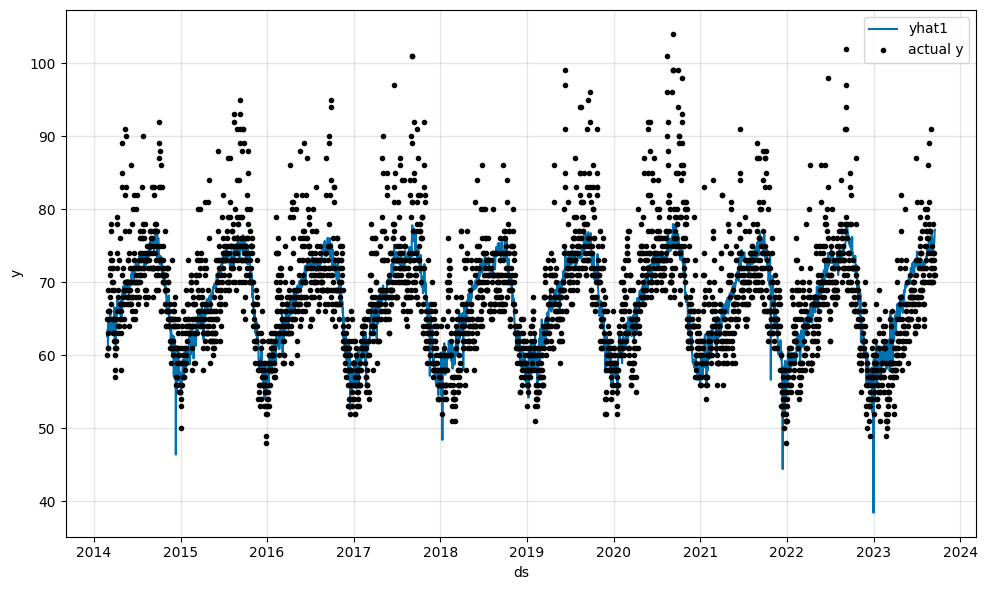

In [51]:
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


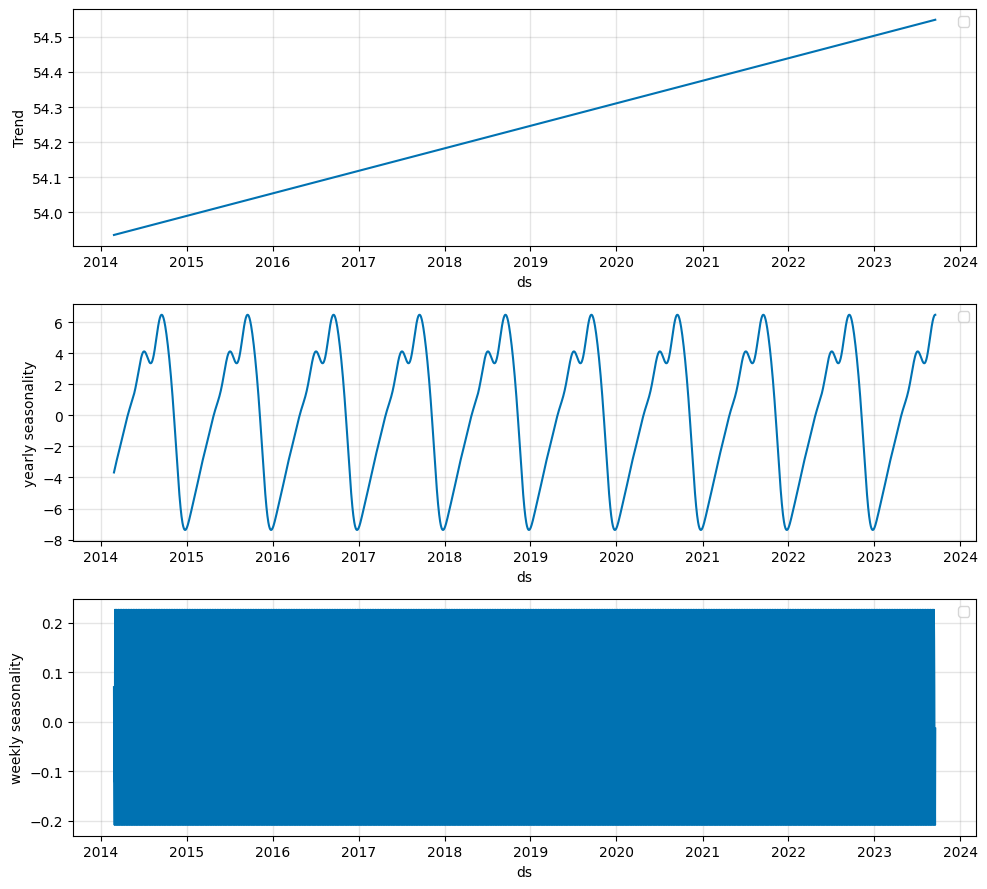

In [67]:
m.plot_components(forecast)

In [71]:
forecast[-365:]

,ds,y,yhat1,lagged_regressor_precip1,lagged_regressor_temp_min1,trend,season_yearly,season_weekly
3127,2022-09-18,72.0,76.024147,-1.470162,16.562962,54.485031,6.460246,-0.013926
3128,2022-09-19,74.0,75.549667,-1.401813,15.792931,54.485207,6.447649,0.225695
3129,2022-09-20,74.0,75.644516,-1.418577,15.981804,54.485382,6.428234,0.167673
3130,2022-09-21,73.0,75.255676,-1.392785,15.691225,54.485558,6.402109,0.069561
3131,2022-09-22,78.0,75.522156,-1.440086,16.224125,54.485733,6.369410,-0.117024
...,...,...,...,...,...,...,...,...
3487,2023-09-13,73.0,75.593338,-1.418577,15.981804,54.548389,6.412157,0.069561
3488,2023-09-14,72.0,75.430939,-1.418577,15.981804,54.548569,6.436170,-0.117024
3489,2023-09-15,71.0,75.971031,-1.470162,16.562962,54.548744,6.453209,-0.123719
3490,2023-09-16,71.0,77.220627,-1.599124,18.015852,54.548920,6.463245,-0.208260


In [75]:
df_future2 = m.make_future_dataframe(val, n_historic_predictions=True, periods=365)
df_future2=df_future2[1:]
df_future2,val
forecast = m.predict(df_future2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 244.81it/s]


ValueError: Length of values (3492) does not match length of index (3491)

In [66]:
df_future2 = m.make_future_dataframe(val, n_historic_predictions=True, periods = 30)
forecast2 = m.predict(df_future2)
m.plot(forecast2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 237.11it/s]


ValueError: Length of values (3493) does not match length of index (3492)